# Semesterarbeit Statistik
Gem. Statistik Dozent: ``4 statistische Verfahren / Konzepte`` ein einem oder n-Datensätze anwenden inkl. vollständiger ``deskriptiver Datenanalyse``

# Our World in Data (OWID)
https://docs.owid.io/projects/etl/api/#owid-catalog

## Inspiration und Durchsicht möglicher Quellen
* **Datapoints used to train:** https://ourworldindata.org/grapher/artificial-intelligence-number-training-datapoints
----
* **Annual patent applications (not detailed on technology):** https://ourworldindata.org/grapher/annual-patent-applications
* **Annual granted patents related to AI:** https://ourworldindata.org/grapher/artificial-intelligence-granted-patents-by-industry
* **Annual working hours:** https://ourworldindata.org/grapher/annual-working-hours-per-worker
* **Annual articles publ in scientific and tech journals:** https://ourworldindata.org/grapher/scientific-publications-per-million
* **Research and development spending as a share of GDP:** https://ourworldindata.org/grapher/research-spending-gdp
* **Research and development per million people vs. GPD per capita:** https://ourworldindata.org/grapher/researchers-in-rd-per-million-people-vs-gdp-pc
----
* **Population:** https://ourworldindata.org/grapher/population
* **Population with UN projections 2100:** https://ourworldindata.org/grapher/population-with-un-projections
* **Median age:** https://ourworldindata.org/grapher/median-age
* **Female Popl by Age** https://ourworldindata.org/grapher/female-population-by-age-group
* **Male Popl by Age** https://ourworldindata.org/grapher/male-population-by-age-group
* **Popl young, working, elderly** https://ourworldindata.org/grapher/population-young-working-elderly-with-projections
----
* **Fertility rate:** https://ourworldindata.org/grapher/children-per-woman-un
* **Population by age group:** https://ourworldindata.org/grapher/population-by-age-group-with-projections
* **Age dependency breakdown by young and old:** https://ourworldindata.org/grapher/age-dependency-breakdown
----
* **Public health expenditure as a share of GDP:** https://ourworldindata.org/grapher/public-health-expenditure-share-gdp

# Datensatzbildung

**Technonoligsche Indikatoren**
   - https://ourworldindata.org/grapher/artificial-intelligence-granted-patents-by-industry
   - https://ourworldindata.org/grapher/research-spending-gdp
   - https://ourworldindata.org/grapher/artificial-intelligence-number-training-datapoints

**Gesundheitsausgaben**
   - https://ourworldindata.org/grapher/public-health-expenditure-share-gdp

**Demografische Daten**
   - https://ourworldindata.org/grapher/median-age
   - https://ourworldindata.org/grapher/age-dependency-breakdown
   ---

In [178]:
from owid.catalog import charts
import pandas as pd

# Technologische Indikatoren
ai_patents_df = charts.get_data('artificial-intelligence-granted-patents-by-industry')
rd_gdp_df = charts.get_data('research-spending-gdp')
ai_training_df = charts.get_data('artificial-intelligence-number-training-datapoints')

# Gesundheitsausgaben
health_df = charts.get_data('public-health-expenditure-share-gdp')

# Demografische Daten
median_age_df = charts.get_data('median-age')
dependency_df = charts.get_data('age-dependency-breakdown')

In [179]:
# kurzer Einblick in die Datensätze
ai_patents_df = ai_patents_df[['entities', 'years', 'num_patent_granted__field_life_sciences']]
ai_patents_df

,entities,years,num_patent_granted__field_life_sciences
0,Argentina,2013,0
1,Argentina,2017,0
2,Argentina,2018,1
3,Argentina,2019,1
4,Argentina,2020,0
...,...,...,...
416,World,2019,4140
417,World,2020,4036
418,World,2021,3180
419,World,2022,1182


In [180]:
# Entities und Years untersuchen
ai_patents_df['entities'].unique(), ai_patents_df['years'].unique()

(array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Brunei',
        'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
        'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
        'Greece', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran',
        'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Latvia',
        'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
        'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines',
        'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Singapore',
        'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
        'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Turkey',
        'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'World'],
       dtype=object),
 array([2013, 2017, 2018, 2019, 2020, 2014, 2015, 2016, 2021, 2022, 2023]))

---

In [181]:
# Bereits mehr Records durch die Unterschiede in Entities und Years
rd_gdp_df

,entities,years,research_spending_gdp
0,Albania,2007,0.08757
1,Albania,2008,0.15412
2,Algeria,2001,0.23028
3,Algeria,2002,0.36640
4,Algeria,2003,0.19623
...,...,...,...
2531,Zambia,2002,0.00544
2532,Zambia,2003,0.00847
2533,Zambia,2004,0.02223
2534,Zambia,2005,0.02493


In [182]:
# Entities und Years untersuchen (bereits ersichtlich die Unterschiede in Jahren und Entities)
rd_gdp_df['entities'].unique(), rd_gdp_df['years'].unique()

(array(['Albania', 'Algeria', 'American Samoa', 'Angola', 'Argentina',
        'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
        'Belarus', 'Belgium', 'Bermuda', 'Bolivia',
        'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Canada',
        'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Congo',
        'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
        'Czechia', 'Democratic Republic of Congo', 'Denmark',
        'East Asia and Pacific (WB)', 'Ecuador', 'Egypt', 'El Salvador',
        'Estonia', 'Eswatini', 'Ethiopia', 'Europe and Central Asia (WB)',
        'European Union (27)', 'Faeroe Islands', 'Finland', 'France',
        'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
        'Greenland', 'Guam', 'Guatemala', 'High-income countries',
        'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
        'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 

In [183]:
test = rd_gdp_df[rd_gdp_df['years'] == 2019]
test

,entities,years,research_spending_gdp
36,Argentina,2019,0.478130
61,Armenia,2019,0.178540
77,Australia,2019,1.828920
101,Austria,2019,3.132470
127,Azerbaijan,2019,0.200130
...,...,...,...
2435,Upper-middle-income countries,2019,1.664090
2458,Uruguay,2019,0.426670
2480,Uzbekistan,2019,0.113060
2501,Vietnam,2019,0.416520


---

In [184]:
# komplett anderer Datensatz (Entities sind keine Länder, sondern ai_systeme, und anstatt Years exisitiert ein Datum usw.). Anzahl der Records: 932
ai_training_df

,entities,dates,training_dataset_size__datapoints,domain
0,(ensemble): AWD-LSTM-DOC (fin) × 5 (WT2),2018-08-30,NaN,Language
1,2-layer-LSTM+Deep-Gradient-Compression,2017-12-05,NaN,Language
2,3D city reconstruction,2009-09-29,NaN,Other
3,4 layer QRNN (h=2500),2018-03-22,NaN,Language
4,6-Act Tether,2021-08-03,NaN,Other
...,...,...,...,...
927,o1-preview,2024-09-12,NaN,Multiple domains
928,top-down frozen classifier,2021-02-09,NaN,Speech
929,wave2vec 2.0 LARGE,2020-10-22,727776000.0,Speech
930,xTrimoPGLM -100B,2023-07-06,NaN,Biology


In [185]:
ai_training_df['entities'].unique()

array(['(ensemble): AWD-LSTM-DOC (fin) × 5 (WT2)',
       '2-layer-LSTM+Deep-Gradient-Compression', '3D city reconstruction',
       '4 layer QRNN (h=2500)', '6-Act Tether', '6-layer MLP (MNIST)',
       'A3C FF hs', 'ADALINE', 'ADAM (CIFAR-10)', 'ADAPTIVE NLPM', 'ADM',
       'AFM-on-device', 'AFM-server', 'ALBERT', 'ALBERT-xxlarge', 'ALIGN',
       'ALM 1.0', 'ALVINN', 'AMDIM', 'ANN Eye Tracker', 'AR-LDM',
       'ASE+ACE', 'ATLAS', 'AWD-LSTM',
       'AWD-LSTM + MoS + Partial Shuffled',
       'AWD-LSTM - 3-layer LSTM (tied) + continuous cache pointer (WT2)',
       'AWD-LSTM+WT+Cache+IOG (WT2)',
       'AWD-LSTM-DRILL + dynamic evaluation† (WT2)',
       'AWD-LSTM-MoS + dynamic evaluation (WT2, 2017)',
       'AWD-LSTM-MoS + dynamic evaluation (WT2, 2018)',
       'AWD-LSTM-MoS+PDR + dynamic evaluation (WT2)',
       'AbLang (heavy sequences)', 'AdaBoost.M2 Digit Recognition',
       'AdaRNN', 'Adaptive Input Transformer + RD',
       'Adaptive Inputs + LayerDrop', 'Adaptive Subgra

---

In [186]:
health_df

,entities,years,public_health_expenditure_share_gdp
0,Argentina,1880,0.000
1,Argentina,1890,0.000
2,Argentina,1900,0.000
3,Argentina,1910,0.000
4,Argentina,1920,0.000
...,...,...,...
2249,United States,2019,13.694
2250,United States,2020,15.694
2251,United States,2021,14.431
2252,United States,2022,13.786


In [187]:
# Auch hier sind die Entities verschieden bezüglich der Anzahl Länder + Jahren (ggf. gemeinsame Entities finden über alle Datensätze)
health_df['entities'].unique(), health_df['years'].unique()

(array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
        'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
        'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
        'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India',
        'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia',
        'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
        'New Zealand', 'Norway', 'Peru', 'Poland', 'Portugal', 'Romania',
        'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
        'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
        'United States'], dtype=object),
 array([1880, 1890, 1900, 1910, 1920, 1930, 2000, 2001, 2002, 2003, 2004,
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021, 1960, 1961, 1962, 1963, 1964,
        1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
        1976, 1977, 197

---

In [188]:
# Bis jetzt der grösste Datensatz. WICHTIG: median_age__sex_all__age_all__variant_estimates sind Historische Daten und median_age__sex_all__age_all__variant_medium sind Prognosen
median_age_df

,entities,years,median_age__sex_all__age_all__variant_estimates,median_age__sex_all__age_all__variant_medium
0,Afghanistan,1950,18.395,NaN
1,Afghanistan,1951,18.370,NaN
2,Afghanistan,1952,18.333,NaN
3,Afghanistan,1953,18.289,NaN
4,Afghanistan,1954,18.239,NaN
...,...,...,...,...
38198,Zimbabwe,2096,NaN,34.802
38199,Zimbabwe,2097,NaN,35.022
38200,Zimbabwe,2098,NaN,35.241
38201,Zimbabwe,2099,NaN,35.463


In [189]:
# Wieder massiv mehr Entities
median_age_df['entities'].unique(), median_age_df['years'].unique()

(array(['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria',
        'American Samoa', 'Andorra', 'Angola', 'Anguilla',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Asia (UN)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
        'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
        'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
        'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Cape Verde', 'Cayman Islands',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
        'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
        'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
        'El Salvad

---

In [190]:
dependency_df

,entities,years,dependency_ratio__sex_all__age_old__variant_estimates,dependency_ratio__sex_all__age_youth__variant_estimates
0,Afghanistan,1950,5.078875,73.154760
1,Afghanistan,1951,5.100585,73.256740
2,Afghanistan,1952,5.114400,73.390884
3,Afghanistan,1953,5.122446,73.564835
4,Afghanistan,1954,5.126268,73.813896
...,...,...,...,...
18939,Zimbabwe,2019,6.552438,78.893740
18940,Zimbabwe,2020,6.602380,77.780350
18941,Zimbabwe,2021,6.596693,76.786766
18942,Zimbabwe,2022,6.585346,75.960910


In [191]:
# Wieder massiv mehr Entities
dependency_df['entities'].unique(), dependency_df['years'].unique()

(array(['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria',
        'American Samoa', 'Americas (UN)', 'Andorra', 'Angola', 'Anguilla',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Asia (UN)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
        'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
        'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
        'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Cape Verde', 'Cayman Islands',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
        'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
        'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
 

In [192]:
# Extrahiere die eindeutigen Entities aus jedem DataFrame
ai_patents_entities = set(ai_patents_df['entities'].unique())
rd_gdp_entities = set(rd_gdp_df['entities'].unique())
health_entities = set(health_df['entities'].unique())
median_age_entities = set(median_age_df['entities'].unique())
dependency_entities = set(dependency_df['entities'].unique())

# Finde die Schnittmenge aller Entity-Sets
common_entities = ai_patents_entities & rd_gdp_entities & health_entities & median_age_entities & dependency_entities

# Konvertiere zu Liste für bessere Lesbarkeit
common_entities_list = list(common_entities)

In [193]:
# Anzahl der gemeinsamen Entities
print(f"Anzahl gemeinsamer Entities: {len(common_entities_list)}")
common_entities_list.sort()

# Zeige die gemeinsamen Entities an
print("Gemeinsame Entities:")
print(common_entities_list)

Anzahl gemeinsamer Entities: 47
Gemeinsame Entities:
['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'United States']


In [194]:
# Finde die Jahre, in denen jede Entity in jedem DataFrame vorkommt
def get_years_with_all_entities(df, entities_list):
    # Gruppiere nach Jahren und zähle die eindeutigen Entities pro Jahr
    entities_per_year = df[df['entities'].isin(entities_list)].groupby('years')['entities'].nunique()
    # Finde Jahre, in denen alle Entities vorkommen
    return entities_per_year[entities_per_year == len(entities_list)].index.tolist()

# Finde Jahre mit allen Entities für jeden DataFrame
ai_patents_years = get_years_with_all_entities(ai_patents_df, common_entities_list)
rd_gdp_years = get_years_with_all_entities(rd_gdp_df, common_entities_list)
health_years = get_years_with_all_entities(health_df, common_entities_list)
median_age_years = get_years_with_all_entities(median_age_df, common_entities_list)
dependency_years = get_years_with_all_entities(dependency_df, common_entities_list)

print("Jahre mit allen Entities in ai_patents_df:", ai_patents_years)
print("Jahre mit allen Entities in rd_gdp_df:", rd_gdp_years)
print("Jahre mit allen Entities in health_df:", health_years)
print("Jahre mit allen Entities in median_age_df:", median_age_years)
print("Jahre mit allen Entities in dependency_df:", dependency_years)



Jahre mit allen Entities in ai_patents_df: []
Jahre mit allen Entities in rd_gdp_df: [2017, 2019]
Jahre mit allen Entities in health_df: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Jahre mit allen Entities in median_age_df: [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 20

In [195]:
# Finde die Schnittmenge der Jahre
common_years = set(ai_patents_years) & set(rd_gdp_years) & set(health_years) & set(median_age_years) & set(dependency_years)

print("\nJahre, in denen alle Entities in allen DataFrames vorkommen:")
print(sorted(common_years))


Jahre, in denen alle Entities in allen DataFrames vorkommen:
[]


In [196]:
# Filtern der Datensätze auf die gemeinsamen Entities
ai_patents_ce = ai_patents_df[ai_patents_df['entities'].isin(common_entities_list)]
rd_gdp_ce = rd_gdp_df[rd_gdp_df['entities'].isin(common_entities_list)]
health_ce = health_df[health_df['entities'].isin(common_entities_list)]
median_age_ce = median_age_df[median_age_df['entities'].isin(common_entities_list)]
dependency_ce = dependency_df[dependency_df['entities'].isin(common_entities_list)]

In [197]:
# Filtern der Datensätze auf das gemeinsame Jahr 2019
ai_patents_ce = ai_patents_ce[ai_patents_ce['years'] == 2019]
rd_gdp_ce = rd_gdp_ce[rd_gdp_ce['years'] == 2019]
health_ce = health_ce[health_ce['years'] == 2019]
median_age_ce = median_age_ce[median_age_ce['years'] == 2019]
dependency_ce = dependency_ce[dependency_ce['years'] == 2019]

In [198]:
print('ai_patents_ce: ', len(ai_patents_ce))
print('rd_gdp_ce: ', len(rd_gdp_ce))
print('health_ce: ', len(health_ce))
print('median_age_ce: ', len(median_age_ce))
print('dependency_ce: ', len(dependency_ce))

ai_patents_ce:  39
rd_gdp_ce:  47
health_ce:  47
median_age_ce:  47
dependency_ce:  47


In [200]:
# Erstelle die 8 neuen Zeilen manuell für ai_patents_ce
new_rows = [
    {'entities': 'Chile', 'years': 2019, 'num_patent_granted__field_life_sciences': 0},
    {'entities': 'Estonia', 'years': 2019, 'num_patent_granted__field_life_sciences': 0},
    {'entities': 'Indonesia', 'years': 2019, 'num_patent_granted__field_life_sciences': 0},
    {'entities': 'Ireland', 'years': 2019, 'num_patent_granted__field_life_sciences': 0},
    {'entities': 'Latvia', 'years': 2019, 'num_patent_granted__field_life_sciences': 0},
    {'entities': 'Slovakia', 'years': 2019, 'num_patent_granted__field_life_sciences': 0},
    {'entities': 'Slovenia', 'years': 2019, 'num_patent_granted__field_life_sciences': 0},
    {'entities': 'South Africa', 'years': 2019, 'num_patent_granted__field_life_sciences': 0}
]

# Füge die neuen Zeilen zum ai_patents_ce DataFrame hinzu
ai_patents_ce = pd.concat([ai_patents_ce, pd.DataFrame(new_rows)], ignore_index=True)

# Überprüfe das Ergebnis für 2019
check = ai_patents_ce[ai_patents_ce['years'] == 2019]
print(f"Anzahl Länder in ai_patents_ce für 2019: {len(check)}")

Anzahl Länder in ai_patents_ce für 2019: 47


In [201]:
print('ai_patents_ce: ', len(ai_patents_ce))
print('rd_gdp_ce: ', len(rd_gdp_ce))
print('health_ce: ', len(health_ce))
print('median_age_ce: ', len(median_age_ce))
print('dependency_ce: ', len(dependency_ce))

ai_patents_ce:  47
rd_gdp_ce:  47
health_ce:  47
median_age_ce:  47
dependency_ce:  47


In [202]:
# Hole alle unique entities aus jedem DataFrame
ai_patents_entities = set(ai_patents_ce['entities'].unique())
rd_gdp_entities = set(rd_gdp_ce['entities'].unique())
health_entities = set(health_ce['entities'].unique())
median_age_entities = set(median_age_ce['entities'].unique())
dependency_entities = set(dependency_ce['entities'].unique())

# Finde die Schnittmenge aller Sets
common_entities = ai_patents_entities & rd_gdp_entities & health_entities & median_age_entities & dependency_entities

# Zeige die Anzahl der Entities in jedem DataFrame
print("Anzahl unique Entities in jedem DataFrame:")
print(f"ai_patents_ce: {len(ai_patents_entities)}")
print(f"rd_gdp_ce: {len(rd_gdp_entities)}")
print(f"health_ce: {len(health_entities)}")
print(f"median_age_ce: {len(median_age_entities)}")
print(f"dependency_ce: {len(dependency_entities)}")
print(f"\nAnzahl gemeinsamer Entities: {len(common_entities)}")

# Zeige für jedes DataFrame, welche Entities fehlen im Vergleich zur Schnittmenge
print("\nFehlende Entities im Vergleich zur Schnittmenge:")
for df_name, df_entities in [
    ("ai_patents_ce", ai_patents_entities),
    ("rd_gdp_ce", rd_gdp_entities),
    ("health_ce", health_entities),
    ("median_age_ce", median_age_entities),
    ("dependency_ce", dependency_entities)
]:
    missing = common_entities - df_entities
    if missing:
        print(f"\n{df_name} fehlen diese Entities:")
        print(sorted(missing))

Anzahl unique Entities in jedem DataFrame:
ai_patents_ce: 47
rd_gdp_ce: 47
health_ce: 47
median_age_ce: 47
dependency_ce: 47

Anzahl gemeinsamer Entities: 47

Fehlende Entities im Vergleich zur Schnittmenge:


In [207]:
# Schrittweises Zusammenführen aller DataFrames
merged_df = ai_patents_ce.merge(
    rd_gdp_ce,
    on=['entities', 'years'],
    how='outer'
).merge(
    health_ce,
    on=['entities', 'years'],
    how='outer'
).merge(
    median_age_ce,
    on=['entities', 'years'],
    how='outer'
).merge(
    dependency_ce,
    on=['entities', 'years'],
    how='outer'
)

# Überprüfe das Ergebnis
print("Informationen zum zusammengeführten DataFrame:")
print(f"Anzahl Zeilen: {len(merged_df)}")
print(f"Anzahl Spalten: {len(merged_df.columns)}")
print("\nSpaltennamen:")
print(merged_df.columns.tolist())

# Zeige die ersten Zeilen
print("\nErste Zeilen des zusammengeführten DataFrames:")
merged_df.head()

Informationen zum zusammengeführten DataFrame:
Anzahl Zeilen: 47
Anzahl Spalten: 9

Spaltennamen:
['entities', 'years', 'num_patent_granted__field_life_sciences', 'research_spending_gdp', 'public_health_expenditure_share_gdp', 'median_age__sex_all__age_all__variant_estimates', 'median_age__sex_all__age_all__variant_medium', 'dependency_ratio__sex_all__age_old__variant_estimates', 'dependency_ratio__sex_all__age_youth__variant_estimates']

Erste Zeilen des zusammengeführten DataFrames:


,entities,years,num_patent_granted__field_life_sciences,research_spending_gdp,public_health_expenditure_share_gdp,median_age__sex_all__age_all__variant_estimates,median_age__sex_all__age_all__variant_medium,dependency_ratio__sex_all__age_old__variant_estimates,dependency_ratio__sex_all__age_youth__variant_estimates
0,Argentina,2019,1,0.47813,5.857,30.763,NaN,18.076710,37.493750
1,Australia,2019,103,1.82892,7.347,36.543,NaN,24.358576,28.536615
2,Austria,2019,0,3.13247,7.873,42.433,NaN,28.405710,21.643929
3,Belgium,2019,0,3.15660,8.089,40.735,NaN,29.676119,26.359116
4,Brazil,2019,16,1.21096,3.930,32.256,NaN,13.304682,30.229200


In [209]:
# Spalte löschen
merged_df = merged_df.drop('median_age__sex_all__age_all__variant_medium', axis=1)

In [210]:
# Überprüfe auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
print(merged_df.isnull().sum())


Anzahl fehlender Werte pro Spalte:
entities                                                   0
years                                                      0
num_patent_granted__field_life_sciences                    0
research_spending_gdp                                      0
public_health_expenditure_share_gdp                        0
median_age__sex_all__age_all__variant_estimates            0
dependency_ratio__sex_all__age_old__variant_estimates      0
dependency_ratio__sex_all__age_youth__variant_estimates    0
dtype: int64


In [211]:
merged_df

,entities,years,num_patent_granted__field_life_sciences,research_spending_gdp,public_health_expenditure_share_gdp,median_age__sex_all__age_all__variant_estimates,dependency_ratio__sex_all__age_old__variant_estimates,dependency_ratio__sex_all__age_youth__variant_estimates
0,Argentina,2019,1,0.47813,5.857,30.763,18.076710,37.493750
1,Australia,2019,103,1.82892,7.347,36.543,24.358576,28.536615
2,Austria,2019,0,3.13247,7.873,42.433,28.405710,21.643929
3,Belgium,2019,0,3.15660,8.089,40.735,29.676119,26.359116
4,Brazil,2019,16,1.21096,3.930,32.256,13.304682,30.229200
5,Bulgaria,2019,0,0.83236,4.297,43.628,33.486595,22.432848
6,Canada,2019,115,1.75573,7.686,39.788,26.330713,24.040808
7,Chile,2019,0,0.34205,5.680,34.328,17.844751,27.117090
8,China,2019,1460,2.24463,3.015,37.026,17.291328,26.092890
9,Colombia,2019,1,0.32201,5.947,30.084,11.747709,31.745905


# Desktiptive Analyse

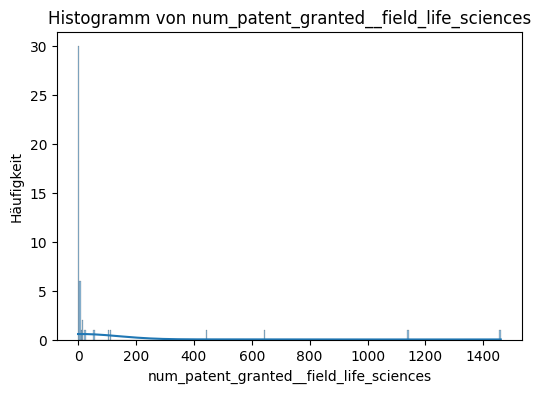

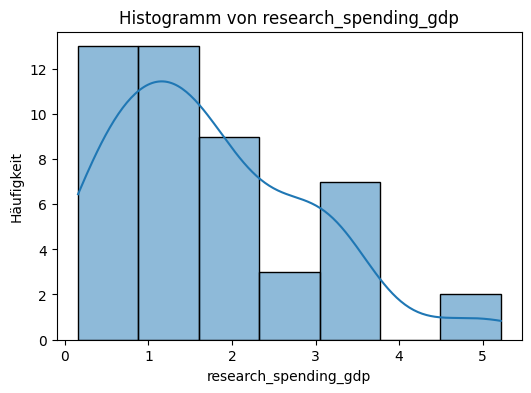

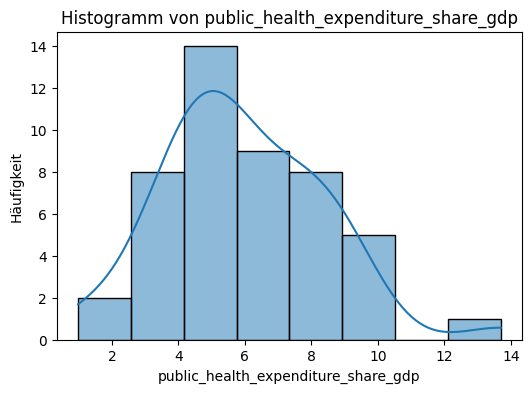

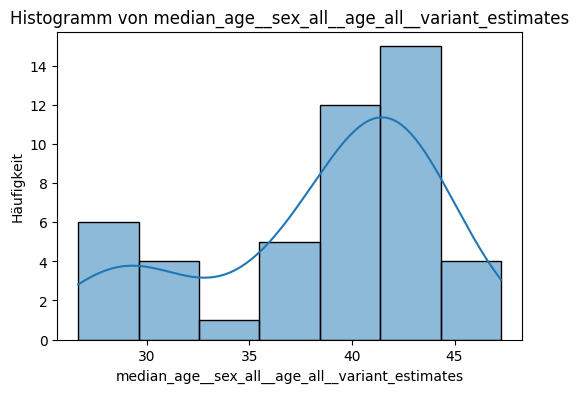

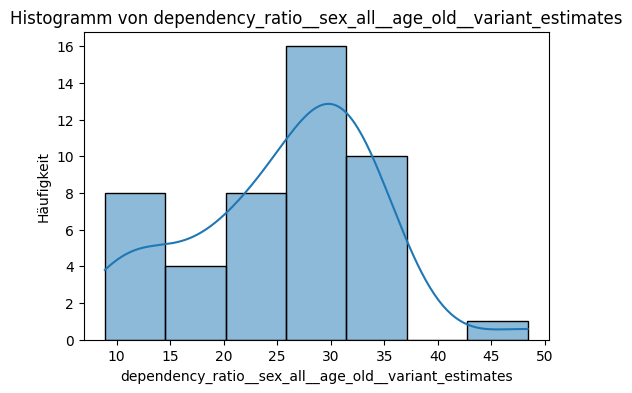

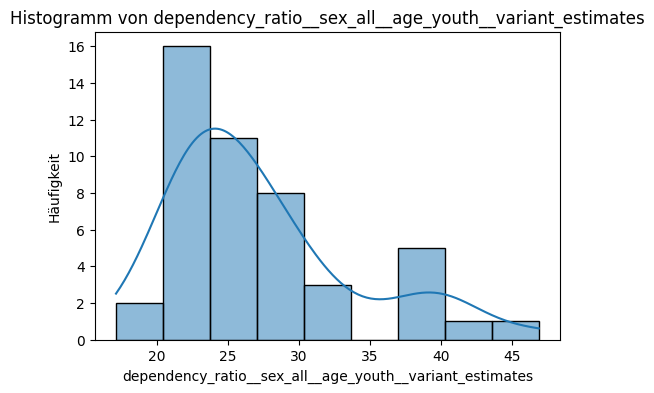

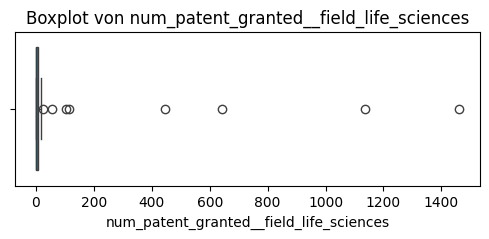

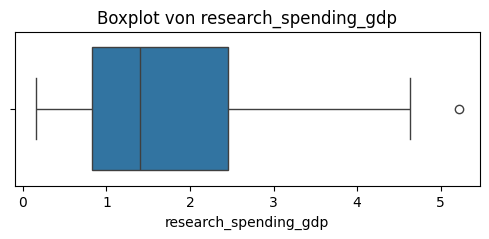

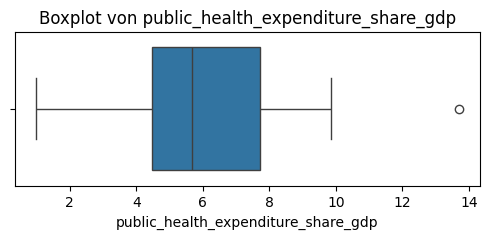

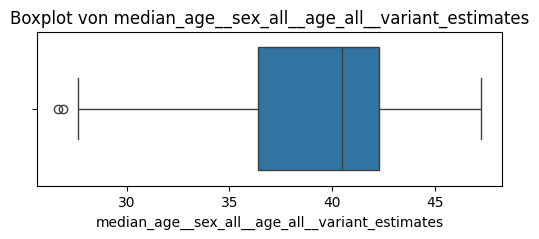

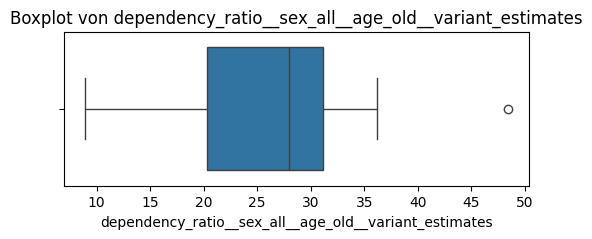

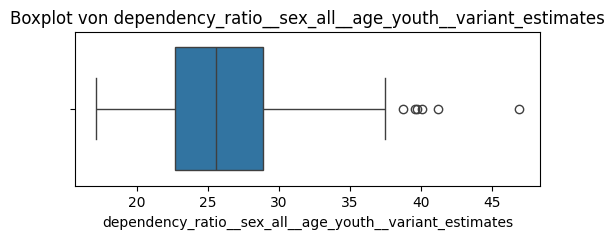

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste der numerischen Variablen (anpassen an deine Spaltennamen)
variablen = [
    'num_patent_granted__field_life_sciences', 
    'research_spending_gdp', 
    'public_health_expenditure_share_gdp', 
    'median_age__sex_all__age_all__variant_estimates', 
    'dependency_ratio__sex_all__age_old__variant_estimates', 
    'dependency_ratio__sex_all__age_youth__variant_estimates'
]

# Histogramme erstellen
for var in variablen:
    plt.figure(figsize=(6,4))
    sns.histplot(merged_df[var], kde=True)
    plt.title(f'Histogramm von {var}')
    plt.xlabel(var)
    plt.ylabel('Häufigkeit')
    plt.show()

# Boxplots erstellen (um Ausreißer sichtbar zu machen)
for var in variablen:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=merged_df[var])
    plt.title(f'Boxplot von {var}')
    plt.xlabel(var)
    plt.show()


# Multiple lineare Regression

## Unabhängige Variablen
**KI-Fortschritt in der Medizin**
- https://ourworldindata.org/grapher/artificial-intelligence-granted-patents-by-industry
- https://ourworldindata.org/grapher/research-spending-gdp

In [214]:
homocide_df = charts.get_data('homicide-rate-unodc')
homocide_df

,entities,years,homicide_rate_unodc
0,Afghanistan,2009,4.071526
1,Afghanistan,2010,3.487093
2,Afghanistan,2011,4.208668
3,Afghanistan,2012,6.393912
4,Afghanistan,2015,9.975262
...,...,...,...
4448,Zimbabwe,2018,4.876369
4449,Zimbabwe,2019,5.145035
4450,Zimbabwe,2020,4.977770
4451,Zimbabwe,2021,6.139985
